In [1]:
import pandas as pd

In [3]:
data_repair=pd.read_csv('/data/raw/data_ksa_long_repair.csv')

In [4]:
data_n=pd.read_csv('/data/raw/data_ksa_long.csv')

In [11]:
data_n['idsubsegmen_old']=data_n.idsegmen.astype(str)+data_n.idsubsegmen

In [9]:
data_repair.head(2)

,Unnamed: 0,idsegmen,idsubsegmen,tahun,bulan,obs,idsubsegmen_repair,idsubsegmen_old
0,0,110101001,A1,22,1,8.0,110101001A1,110101001A1
1,1,110101001,A2,22,1,4.0,110101001A2,110101001B1


In [14]:
data_merged=data_n[['idsubsegmen_old','latitude','longitude']].merge(data_repair)

In [19]:
data_merged=data_merged[['idsubsegmen_repair','latitude','longitude','obs','tahun','bulan']]
data_merged['kdprov']=data_merged.idsubsegmen_repair.apply(lambda y: y[:2])

In [21]:
data_merged_jabar=data_merged.query('kdprov=="32"')

In [31]:
data_merged_jabar['idsubfinal']=data_merged_jabar.idsubsegmen_repair+data_merged_jabar.tahun.astype(str)+data_merged_jabar.bulan.astype(str)

/tmp/ipykernel_3128271/903533395.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_merged_jabar['idsubfinal']=data_merged_jabar.idsubsegmen_repair+data_merged_jabar.tahun.astype(str)+data_merged_jabar.bulan.astype(str)


In [52]:
data_merged_jabar['idkab']=data_merged_jabar.idsubfinal.apply(lambda y: y[:4])
data_merged_jabar['idkec']=data_merged_jabar.idsubfinal.apply(lambda y: y[:7])
data_merged_jabar['idsegmen']=data_merged_jabar.idsubfinal.apply(lambda y: y[:9])

/tmp/ipykernel_3128271/3723611045.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_merged_jabar['idkab']=data_merged_jabar.idsubfinal.apply(lambda y: y[:4])
/tmp/ipykernel_3128271/3723611045.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_merged_jabar['idkec']=data_merged_jabar.idsubfinal.apply(lambda y: y[:7])
/tmp/ipykernel_3128271/3723611045.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

In [53]:
#mendapatkan puso pertama per idsubsegmen
data_puso=data_merged_jabar.query('obs==6').groupby('idsubsegmen_repair').first().reset_index()

In [54]:
data_nonpuso=data_merged_jabar.query('idkec in @data_puso.idkec').query('idsubfinal not in @data_puso.idsubfinal').query('obs!=6')

In [64]:
data_workshop=pd.concat([data_puso,data_nonpuso.groupby('idsegmen').sample(5)])

In [65]:
data_workshop['is_puso']=data_workshop.obs.apply(lambda y: 1 if y==6 else 0)

In [87]:
data_workshop.to_csv('Workshop_PUSO.csv',sep=';',index=False)

/tmp/ipykernel_3128271/3546814965.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_workshop, x='is_puso',palette='Set2')


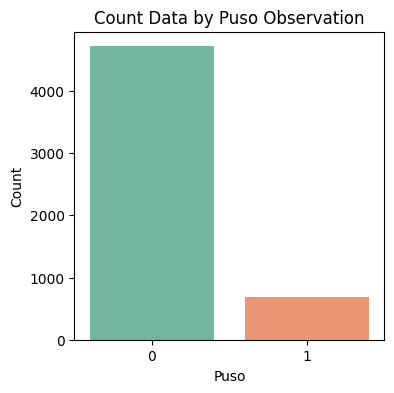

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create a bar plot
plt.figure(figsize=(4, 4))
sns.countplot(data=data_workshop, x='is_puso',palette='Set2')

# Add labels and title
plt.title('Count Data by Puso Observation')
plt.xlabel('Puso')
plt.ylabel('Count')
plt.show()

/data/home/achmad.firmansyah/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


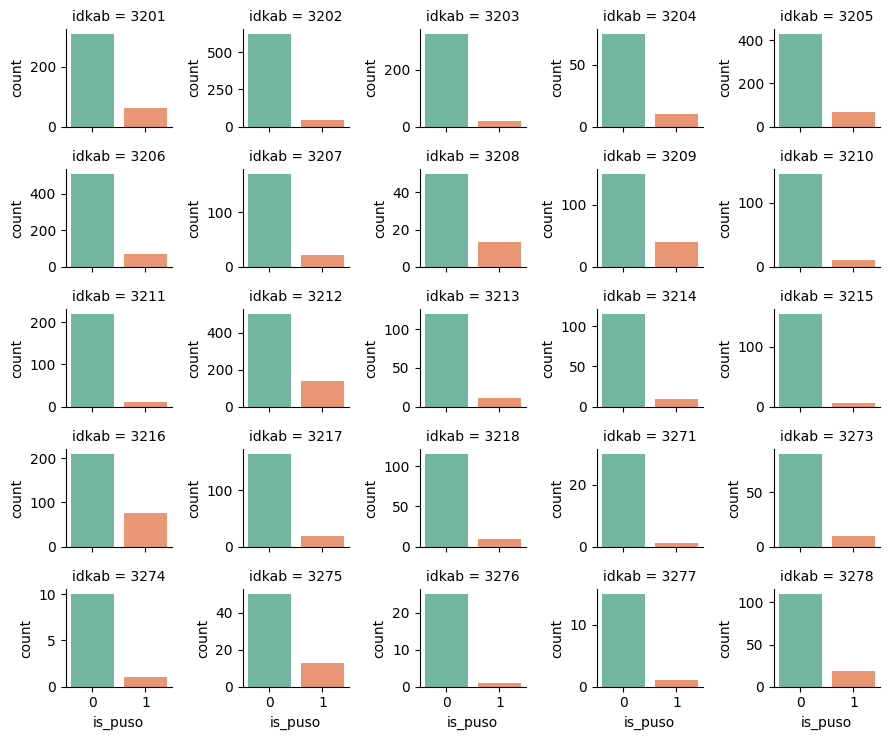

In [84]:
g = sns.FacetGrid(data_workshop, col='idkab',hue='is_puso', col_wrap=5,
                  sharey=False, height=1.5, aspect=1.2, palette='Set2')
g.map(sns.countplot, 'is_puso')

In [80]:
len(data_workshop.idkab.unique())

25

In [88]:
import os
import zipfile

# Define the directory containing the zip files
zip_dir = '/data/ksa/00_Code/12_Workshop_Puso'

# Iterate through all files in the directory
for filename in os.listdir(zip_dir):
    if filename.endswith('.zip'):
        # Construct full file path
        zip_path = os.path.join(zip_dir, filename)
        
        # Create a folder to extract the contents
        extract_dir = os.path.join(zip_dir+'/climate_data', filename.replace('.zip', ''))
        os.makedirs(extract_dir, exist_ok=True)

        # Extract the zip file
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(extract_dir)
        
        print(f'Extracted {filename} to {extract_dir}')

Extracted 2020_10_data.zip to /data/ksa/00_Code/12_Workshop_Puso/climate_data/2020_10_data
Extracted 2020_01_data_max.zip to /data/ksa/00_Code/12_Workshop_Puso/climate_data/2020_01_data_max
Extracted 2020_09_data.zip to /data/ksa/00_Code/12_Workshop_Puso/climate_data/2020_09_data
Extracted 2021_03_data.zip to /data/ksa/00_Code/12_Workshop_Puso/climate_data/2021_03_data
Extracted 2021_07_data.zip to /data/ksa/00_Code/12_Workshop_Puso/climate_data/2021_07_data
Extracted 2020_07_data_min.zip to /data/ksa/00_Code/12_Workshop_Puso/climate_data/2020_07_data_min
Extracted 2021_06_data_max.zip to /data/ksa/00_Code/12_Workshop_Puso/climate_data/2021_06_data_max
Extracted 2021_01_data_min.zip to /data/ksa/00_Code/12_Workshop_Puso/climate_data/2021_01_data_min
Extracted 2021_11_data_min.zip to /data/ksa/00_Code/12_Workshop_Puso/climate_data/2021_11_data_min
Extracted 2021_06_data_min.zip to /data/ksa/00_Code/12_Workshop_Puso/climate_data/2021_06_data_min
Extracted 2020_11_data_max.zip to /data/ks